In [1]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline # This allows plots to appear in the notebook

In [34]:
# We import our access keys:
from credentials import *    # This will allow us to use the keys as variables

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

query = "#Melbourne"
max_tweets = 10000
# By replacing the api.search with api.user_timeline(screen_name="") I'd be able to scrape tweets off individual users.

searched_tweets = []
last_id = -1
while len(searched_tweets) < max_tweets:
    count = max_tweets - len(searched_tweets)
    try:
        new_tweets = api.search(q=query, count=count, lang="en", max_id=str(last_id - 1))
        if not new_tweets:
            break
        searched_tweets.extend(new_tweets)
        last_id = new_tweets[-1].id
    except tweepy.TweepError as e:
        # depending on TweepError.code, one may want to retry or wait
        # to keep things simple, we will give up on an error
        break

In [35]:
print("Number of tweets extracted: {}.\n".format(len(searched_tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in searched_tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 10000.

5 recent tweets:

RT @SputnikInt: BREAKING: #Melbourne car ramming incident is a deliberate act - police https://t.co/ukXGJsYq0Q https://t.co/6Fjd8VG1ur

RT @RunnerKiev: Picture of the passenger of the SUV in #Melbourne - notorious Islamist podcast host Mikail el-Nuk, extremist Syrian immigra…

RT @KTHopkins: ‘We don’t yet know the drivers motivation’ #Melbourne https://t.co/j1TzdT4UMj

RT @KTHopkins: Get them out. Get their families out. Close their mosque. Remove the extremist Imam. #Melbourne #AVeryMerryMuslimChristmas h…

RT @AmyMek: No Surprise about today's TERROR attack in #Melbourne ...

JEWS ARE NO LONGER WELCOME IN SHARIA AUSTRALIA! 

Synagogues are now…



In [36]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in searched_tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.tail(10))

,Tweets
9990,RT @TomMarlow_: Police in #Melbourne are curre...
9991,RT @SputnikInt: BREAKING: Car rams into crowd ...
9992,Let's not jump to conclusions and..... It's IS...
9993,RT @TerrorEvents: #Australia #Melbourne - Scen...
9994,"#Melbourne Crowd Is Hit by S.U.V., and #Driver..."
9995,RT @ABCemergency: Latest on the #Melbourne inc...
9996,RT @guyelster: 12 wounded in #Melbourne #Austr...
9997,RT @KennethOath: Driver and passenger in the c...
9998,RT @business: Car hits pedestrians in central ...
9999,RT @OnlineMagazin: 🆘‼️👮🔥 +++Break+++ #Australi...


In [37]:
# We add relevant data:
data['userScreen'] = np.array([tweet.user.screen_name for tweet in searched_tweets])
data['userName'] = np.array([tweet.user.name for tweet in searched_tweets])
data['len']  = np.array([len(tweet.text) for tweet in searched_tweets])
data['ID']   = np.array([tweet.id for tweet in searched_tweets])
data['Date'] = np.array([tweet.created_at for tweet in searched_tweets])
data['Source'] = np.array([tweet.source for tweet in searched_tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in searched_tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in searched_tweets])
data['userLocation'] = np.array([tweet.user.location for tweet in searched_tweets])
data['userTimezone'] = np.array([tweet.user.time_zone for tweet in searched_tweets])
data['userCreateDt'] = np.array([tweet.user.created_at for tweet in searched_tweets])



In [60]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,userScreen,userName,len,ID,Date,Source,Likes,RTs,userLocation,userTimezone,userCreateDt
0,RT @SputnikInt: BREAKING: #Melbourne car rammi...,McKGraKucPauNad,McKiGravKuciPaulNade,134,943791413787062272,2017-12-21 10:33:02,Twitter Web Client,0,7,,Central Time (US & Canada),2010-10-11 08:40:28
1,RT @RunnerKiev: Picture of the passenger of th...,SophiaMariaLuna,Luna,140,943791411488546816,2017-12-21 10:33:01,Twitter for iPhone,0,56,Jersey - North & South,None,2011-06-17 00:26:10
2,RT @KTHopkins: ‘We don’t yet know the drivers ...,EdMi1ibuddha,Ed Miliband's Ghost 🚜🐄🐖🐓💂,92,943791409856958464,2017-12-21 10:33:01,Twitter Web Client,0,89,North Devon,Pacific Time (US & Canada),2015-04-07 13:44:06
3,RT @KTHopkins: Get them out. Get their familie...,TerryHoughton8,Terry Houghton,140,943791407155896320,2017-12-21 10:33:00,Twitter Lite,0,620,,None,2017-04-03 21:20:03
4,RT @AmyMek: No Surprise about today's TERROR a...,dcbrin,David,140,943791404941217793,2017-12-21 10:33:00,Twitter for iPhone,0,194,"Florida, USA",None,2010-04-12 19:37:45
5,Thoughts and prayers to the victims in #Melbou...,jenellous,Starr 💕,60,943791400587476992,2017-12-21 10:32:59,Twitter for iPhone,0,0,Australia,None,2016-04-10 17:23:45
6,Strategic Management Assignment Help | USAassi...,johnmartinsmart,John Martin 🇺🇸,134,943791384967839744,2017-12-21 10:32:55,Twitter Web Client,0,0,"Dallas, TX",Pacific Time (US & Canada),2016-09-03 07:05:16
7,RT @KTHopkins: Get them out. Get their familie...,Krypto284,London Lad,140,943791379297308672,2017-12-21 10:32:54,Twitter Web Client,0,620,London,Amsterdam,2013-06-14 00:32:51
8,#Melbourne Two people arrested? High speed veh...,AnoosheMushtaq,Anooshe Mushtaq ‎ ‎انوشے مشتاق,128,943791375660625920,2017-12-21 10:32:53,Twitter for iPhone,0,0,Australia,None,2014-01-11 11:36:14
9,Woke up to hear awful stories coming from #Mel...,CMcLaughlin14,Christopher,140,943791368748617728,2017-12-21 10:32:51,Twitter for iPad,0,0,Dreamland,London,2010-03-06 23:51:58


In [48]:
# Checking the columns data-types:
data.dtypes


Tweets                  object
userScreen              object
userName                object
len                      int64
ID                       int64
Date            datetime64[ns]
Source                  object
Likes                    int64
RTs                      int64
userLocation            object
userTimezone            object
userCreateDt    datetime64[ns]
dtype: object

In [52]:
# We see the data in Date and userCreateDt already is importet in Pandas special datetime-format. 
# There is no need to modify these further (UTC, 11 hours behind Melbourne, Australia). Other data-types are objects 
# (e.g. strings) and integers (numbers).

# Time between the oldest and most recent extracted tweet can be found with following function:
data.Date.max() - data.Date.min()

Timedelta('0 days 03:08:09')

In [91]:
# Now, we are interested in looking closer at "Likes". We can use Pandas describe function (for DataFrames and Series):
# (normalize=True) gives percentages of total volume. 
data.Likes.value_counts(normalize=True)

0      0.8705
1      0.0546
2      0.0233
3      0.0124
5      0.0070
4      0.0062
6      0.0041
7      0.0025
10     0.0021
9      0.0017
8      0.0016
14     0.0011
20     0.0009
25     0.0006
11     0.0006
13     0.0006
12     0.0006
15     0.0006
17     0.0005
52     0.0004
33     0.0004
21     0.0004
29     0.0003
23     0.0003
22     0.0003
40     0.0003
37     0.0002
31     0.0002
30     0.0002
51     0.0002
        ...  
55     0.0001
47     0.0001
794    0.0001
43     0.0001
270    0.0001
166    0.0001
125    0.0001
117    0.0001
69     0.0001
61     0.0001
53     0.0001
38     0.0001
46     0.0001
420    0.0001
364    0.0001
244    0.0001
148    0.0001
44     0.0001
36     0.0001
134    0.0001
183    0.0001
142    0.0001
451    0.0001
179    0.0001
171    0.0001
91     0.0001
75     0.0001
59     0.0001
19     0.0001
391    0.0001
Name: Likes, Length: 79, dtype: float64

In [80]:
# A nice thing about Pandas is that series and dataframe methods output new series and dataframe objects
# So we see that the type of value_counts is itself a series:
type(data.Likes.value_counts())

pandas.core.series.Series

In [82]:
# This means that I can use series-methods like .head():
data.Likes.value_counts(normalize=True).head()

0    0.8705
1    0.0546
2    0.0233
3    0.0124
5    0.0070
Name: Likes, dtype: float64

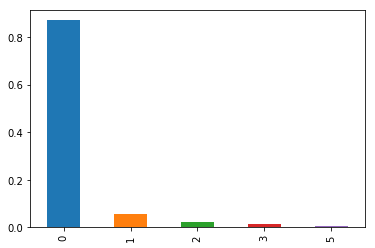

In [115]:
#It is easy to do a plot on this:
data.Likes.value_counts(normalize=True).head().plot(kind='bar')

In [134]:
# We can also do a crosstab (not sure how much sense there is in this but...):
pd.crosstab(data.userName, data.Likes.head())

Likes,0
userName,
David,1
Ed Miliband's Ghost 🚜🐄🐖🐓💂,1
Luna,1
McKiGravKuciPaulNade,1
Terry Houghton,1


In [117]:
# More data insepction...
data.RTs.describe()

count    10000.000000
mean       127.117900
std        187.677597
min          0.000000
25%          2.000000
50%         34.000000
75%        162.000000
max       2961.000000
Name: RTs, dtype: float64

In [165]:
# Summary statistics of overall data-columns (where the data-type can make such statistics to happen)
data.describe()

,len,ID,Likes,RTs,SA
count,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000
mean,125.960700,9.437679e+17,1.405800,127.117900,0.078700
std,23.781411,1.330566e+13,22.458445,187.677597,0.713833
min,18.000000,9.437441e+17,0.000000,0.000000,-1.000000
25%,120.000000,9.437569e+17,0.000000,2.000000,0.000000
50%,140.000000,9.437679e+17,0.000000,34.000000,0.000000
75%,140.000000,9.437792e+17,0.000000,162.000000,1.000000
max,152.000000,9.437914e+17,1378.000000,2961.000000,1.000000


In [297]:
# The amount of unique user-entries:
data.userScreen.nunique()

6640

In [201]:
# The 13 most liked tweets
# ... Found by extracting a number from the Likes.max() number, providing a list of 
# tweets with likes between that number and .max()
topLikes = data[(data.Likes >= data.Likes.max()-1200)]
topLikes


,Tweets,userScreen,userName,len,ID,Date,Source,Likes,RTs,userLocation,userTimezone,userCreateDt,SA
1881,‘We don’t yet know the drivers motivation’ #Me...,KTHopkins,Katie Hopkins,77,943781871934214144,2017-12-21 09:55:07,Twitter for iPhone,183,89,,Hawaii,2009-02-20 22:01:54,0
3071,"Let me help you, sir. The motivation was to ki...",KTHopkins,Katie Hopkins,138,943776934214930432,2017-12-21 09:35:30,Twitter for iPhone,794,397,,Hawaii,2009-02-20 22:01:54,0
3309,Come on the Khan’t. We’re waiting... you stand...,KTHopkins,Katie Hopkins,139,943775895306858496,2017-12-21 09:31:22,Twitter for iPhone,364,152,,Hawaii,2009-02-20 22:01:54,-1
3529,BBC v REALITY. #AVeryMerryMuslimChristmas #Mel...,KTHopkins,Katie Hopkins,76,943774918789029888,2017-12-21 09:27:29,Twitter for iPhone,179,81,,Hawaii,2009-02-20 22:01:54,0
4080,Get them out. Get their families out. Close th...,KTHopkins,Katie Hopkins,120,943772726162022401,2017-12-21 09:18:47,Twitter for iPhone,1378,627,,Hawaii,2009-02-20 22:01:54,0
4277,Leaders. Do not say you stand shoulder to shou...,KTHopkins,Katie Hopkins,140,943771867445424128,2017-12-21 09:15:22,Twitter for iPhone,1072,451,,Hawaii,2009-02-20 22:01:54,0
5479,The one thing I can't stop thinking is all the...,Rosse_B,Rossella Belardi,139,943765353187782656,2017-12-21 08:49:29,Twitter for iPhone,217,48,Melbourne,Melbourne,2009-04-11 17:34:51,0
6027,#Terror has no religion. Our thoughts &amp; pr...,MuslimsDwnUnder,Muslims Down Under,137,943762701423034368,2017-12-21 08:38:56,Twitter for iPhone,420,161,Australia,Pacific Time (US & Canada),2017-04-24 08:07:31,0
6370,Donald Trump of Australia! \n\nMeet Brave Sena...,AmyMek,Amy Mek,120,943761373628194817,2017-12-21 08:33:40,Twitter Web Client,451,262,NYC,Atlantic Time (Canada),2012-11-17 18:46:39,1
7147,@BBCBreaking #Melbourne is one of the most tol...,Michael_Dunn4,Michael,140,943758302411919360,2017-12-21 08:21:28,Twitter for iPhone,270,72,Bill Quay,Casablanca,2011-10-01 20:00:49,1


In [204]:
# Formatting the dataframe in decending order
topLikes.sort_values(by='Likes', ascending=[False])

,Tweets,userScreen,userName,len,ID,Date,Source,Likes,RTs,userLocation,userTimezone,userCreateDt,SA
4080,Get them out. Get their families out. Close th...,KTHopkins,Katie Hopkins,120,943772726162022401,2017-12-21 09:18:47,Twitter for iPhone,1378,627,,Hawaii,2009-02-20 22:01:54,0
4277,Leaders. Do not say you stand shoulder to shou...,KTHopkins,Katie Hopkins,140,943771867445424128,2017-12-21 09:15:22,Twitter for iPhone,1072,451,,Hawaii,2009-02-20 22:01:54,0
3071,"Let me help you, sir. The motivation was to ki...",KTHopkins,Katie Hopkins,138,943776934214930432,2017-12-21 09:35:30,Twitter for iPhone,794,397,,Hawaii,2009-02-20 22:01:54,0
6370,Donald Trump of Australia! \n\nMeet Brave Sena...,AmyMek,Amy Mek,120,943761373628194817,2017-12-21 08:33:40,Twitter Web Client,451,262,NYC,Atlantic Time (Canada),2012-11-17 18:46:39,1
6027,#Terror has no religion. Our thoughts &amp; pr...,MuslimsDwnUnder,Muslims Down Under,137,943762701423034368,2017-12-21 08:38:56,Twitter for iPhone,420,161,Australia,Pacific Time (US & Canada),2017-04-24 08:07:31,0
8350,How many more innocent people need to be harme...,AmyMek,Amy Mek,144,943752833786109953,2017-12-21 07:59:44,Twitter Web Client,391,221,NYC,Atlantic Time (Canada),2012-11-17 18:46:39,1
3309,Come on the Khan’t. We’re waiting... you stand...,KTHopkins,Katie Hopkins,139,943775895306858496,2017-12-21 09:31:22,Twitter for iPhone,364,152,,Hawaii,2009-02-20 22:01:54,-1
7738,Hey #Melbourne just a reminder that after atta...,Gaohmee,Jennifer Scheurle,140,943755816057704450,2017-12-21 08:11:35,Twitter for iPhone,336,102,"Melbourne, Victoria",Pacific Time (US & Canada),2015-05-26 05:17:55,0
7147,@BBCBreaking #Melbourne is one of the most tol...,Michael_Dunn4,Michael,140,943758302411919360,2017-12-21 08:21:28,Twitter for iPhone,270,72,Bill Quay,Casablanca,2011-10-01 20:00:49,1
9323,🆘‼️👮🔥 #Australia: Raw footage from #Melbourne ...,OnlineMagazin,Onlinemagazin,140,943747658195390464,2017-12-21 07:39:10,Twitter Web Client,244,486,"New York, USA",Bern,2010-02-13 18:20:12,-1


In [218]:
# Get the tweets above. 
data.loc[9323,'Tweets']


'🆘‼️👮🔥 #Australia: Raw footage from #Melbourne outside the Flinter St Station. The driver of an SUV plowed into a cr… https://t.co/aDZBBlbVUs'

In [237]:
# Find user with most tweets:
data.userScreen.max() # calls the user that appears most times under the userScreen column


'zwickyinstitut'

In [299]:
# Find top-10 tweeters:
topTweeters = data.groupby(by=['userScreen', 'userName'])['Tweets'].count()
topTweeters.sort_values(ascending=[False]).head(10)

userScreen     userName                
hitech_guru    Sandeep Shenoy              42
sathish0820    sathish kumar               29
code_baron     Code Baron                  23
DateanInmate   🦄🌸GermanGirl🌸🦄              19
sn0wba1111     Hillary Ffrench (GAB.AI)    17
bazzamac1968   WESTHAMPATRIOT&PROUD        15
Etete21        Etete Udi                   15
invictus_dave  Dave Invictus               15
shellyyk1977   Shelly💫                     15
adboa95        A Boado 🇺🇸                  15
Name: Tweets, dtype: int64

In [72]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("By user: {}".format(data['userName'][fav]))
print("With the screenname: {}".format(data['userScreen'][fav]))
print("Tweet length: {} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("By user: {}".format(data['userName'][rt]))
print("With the screenname: {}".format(data['userScreen'][rt]))
print("Tweet length: {} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
Get them out. Get their families out. Close their mosque. Remove the extremist Imam. #Melbourne… https://t.co/oMYEEDjJ6R
Number of likes: 1378
By user: Katie Hopkins
With the screenname: KTHopkins
Tweet length: 120 characters.

The tweet with more retweets is: 
RT @kylieminogue: @NiallOfficial #ThisTown giving me all the feels as I️ get ready for @theprojecttv in my hometown #Melbourne 💗
Number of retweets: 2961
By user: Aisyah
With the screenname: NrAiisyaah_
Tweet length: 128 characters.



In [128]:
# I can find out if Katie Hopkins has tweeted more than one time:
data[data.userScreen=='KTHopkins']

,Tweets,userScreen,userName,len,ID,Date,Source,Likes,RTs,userLocation,userTimezone,userCreateDt,SA
177,Definitely nothing to do with terror. The peo...,KTHopkins,Katie Hopkins,138,943790578512392192,2017-12-21 10:29:43,Twitter for iPhone,40,14,,Hawaii,2009-02-20 22:01:54,-1
510,Resist the narrative. ‘Car ploughs into pedest...,KTHopkins,Katie Hopkins,140,943788538272927744,2017-12-21 10:21:36,Twitter for iPhone,137,77,,Hawaii,2009-02-20 22:01:54,0
1881,‘We don’t yet know the drivers motivation’ #Me...,KTHopkins,Katie Hopkins,77,943781871934214144,2017-12-21 09:55:07,Twitter for iPhone,183,89,,Hawaii,2009-02-20 22:01:54,0
3071,"Let me help you, sir. The motivation was to ki...",KTHopkins,Katie Hopkins,138,943776934214930432,2017-12-21 09:35:30,Twitter for iPhone,794,397,,Hawaii,2009-02-20 22:01:54,0
3309,Come on the Khan’t. We’re waiting... you stand...,KTHopkins,Katie Hopkins,139,943775895306858496,2017-12-21 09:31:22,Twitter for iPhone,364,152,,Hawaii,2009-02-20 22:01:54,-1
3529,BBC v REALITY. #AVeryMerryMuslimChristmas #Mel...,KTHopkins,Katie Hopkins,76,943774918789029888,2017-12-21 09:27:29,Twitter for iPhone,179,81,,Hawaii,2009-02-20 22:01:54,0
4080,Get them out. Get their families out. Close th...,KTHopkins,Katie Hopkins,120,943772726162022401,2017-12-21 09:18:47,Twitter for iPhone,1378,627,,Hawaii,2009-02-20 22:01:54,0
4277,Leaders. Do not say you stand shoulder to shou...,KTHopkins,Katie Hopkins,140,943771867445424128,2017-12-21 09:15:22,Twitter for iPhone,1072,451,,Hawaii,2009-02-20 22:01:54,0


In [15]:
tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

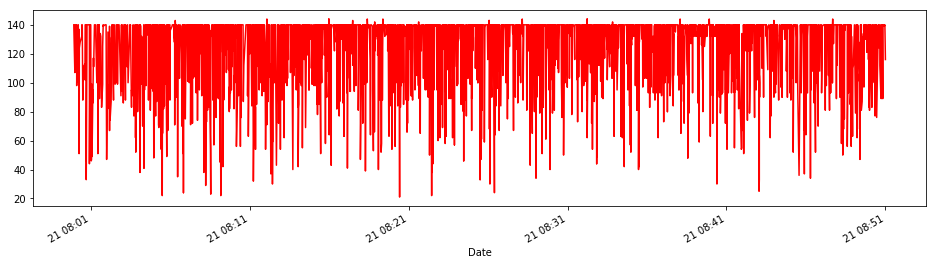

In [191]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

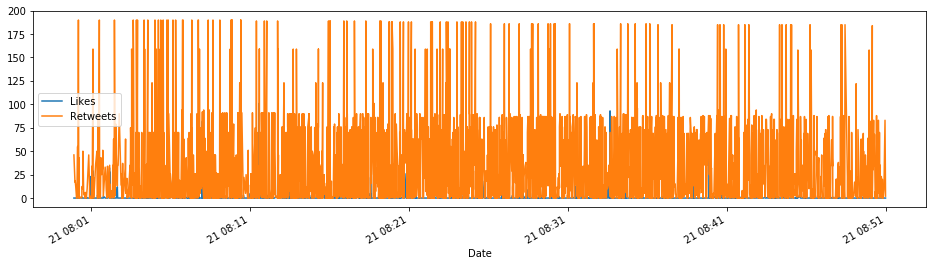

In [187]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [18]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for Android
* Twitter Web Client
* Instagram
* Twitter for iPhone
* Twitter for iPad
* One News Page
* Twitter Lite
* Hootsuite
* Twitter for Nokia S40
* kurt_posts
* Paper.li
* TweetDeck
* Twitter for Windows
* Twitterrific
* Gab.ai
* Vinz Clortho
* bot_onhospital
* Tweetbot for iΟS
* IFTTT
* adelaidetags
* Sean Houston 
* JamBotBooks
* News365247live
* Twitter for Windows Phone
* TweetCaster for Android
* Zapier.com
* Echofon
* SocialFlow
* Twitter for Mac
* Tweetlogix
* Reddit stuff
* GetAllJobs
* RoundTeam
* Facebook
* Mobile Web (M2)
* Catalonia RT
* Plume for Android
* Tweet Old Post
* Buffer
* Lead Stories Feed Publisher
* SnappyTV.com
* Trendsmap Alerting
* Labour RSS Feed
* Google
* Crowdfire - Go Big
* Twitter for Android Tablets
* Trendinalia Singapore
* MutterFly
* TweetCaster for iOS
* WebTopTrends Interface
* Media Studio
* Cloudhopper
* Twidere for Android #5
* thinkpraybot
* NewsUpdatesToday
* Talon (Plus)
* Flamingo for Android
* 

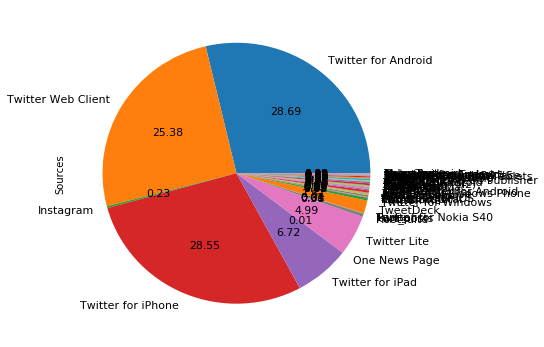

In [73]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [75]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [76]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,userScreen,userName,len,ID,Date,Source,Likes,RTs,userLocation,userTimezone,userCreateDt,SA
0,RT @SputnikInt: BREAKING: #Melbourne car rammi...,McKGraKucPauNad,McKiGravKuciPaulNade,134,943791413787062272,2017-12-21 10:33:02,Twitter Web Client,0,7,,Central Time (US & Canada),2010-10-11 08:40:28,0
1,RT @RunnerKiev: Picture of the passenger of th...,SophiaMariaLuna,Luna,140,943791411488546816,2017-12-21 10:33:01,Twitter for iPhone,0,56,Jersey - North & South,None,2011-06-17 00:26:10,0
2,RT @KTHopkins: ‘We don’t yet know the drivers ...,EdMi1ibuddha,Ed Miliband's Ghost 🚜🐄🐖🐓💂,92,943791409856958464,2017-12-21 10:33:01,Twitter Web Client,0,89,North Devon,Pacific Time (US & Canada),2015-04-07 13:44:06,0
3,RT @KTHopkins: Get them out. Get their familie...,TerryHoughton8,Terry Houghton,140,943791407155896320,2017-12-21 10:33:00,Twitter Lite,0,620,,None,2017-04-03 21:20:03,0
4,RT @AmyMek: No Surprise about today's TERROR a...,dcbrin,David,140,943791404941217793,2017-12-21 10:33:00,Twitter for iPhone,0,194,"Florida, USA",None,2010-04-12 19:37:45,1
5,Thoughts and prayers to the victims in #Melbou...,jenellous,Starr 💕,60,943791400587476992,2017-12-21 10:32:59,Twitter for iPhone,0,0,Australia,None,2016-04-10 17:23:45,0
6,Strategic Management Assignment Help | USAassi...,johnmartinsmart,John Martin 🇺🇸,134,943791384967839744,2017-12-21 10:32:55,Twitter Web Client,0,0,"Dallas, TX",Pacific Time (US & Canada),2016-09-03 07:05:16,0
7,RT @KTHopkins: Get them out. Get their familie...,Krypto284,London Lad,140,943791379297308672,2017-12-21 10:32:54,Twitter Web Client,0,620,London,Amsterdam,2013-06-14 00:32:51,0
8,#Melbourne Two people arrested? High speed veh...,AnoosheMushtaq,Anooshe Mushtaq ‎ ‎انوشے مشتاق,128,943791375660625920,2017-12-21 10:32:53,Twitter for iPhone,0,0,Australia,None,2014-01-11 11:36:14,-1
9,Woke up to hear awful stories coming from #Mel...,CMcLaughlin14,Christopher,140,943791368748617728,2017-12-21 10:32:51,Twitter for iPad,0,0,Dreamland,London,2010-03-06 23:51:58,-1


In [5]:

# We display the updated dataframe with the new column:
display(data.head(10))

NameError: name 'data' is not defined

In [77]:
pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [78]:
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 29.72%
Percentage of neutral tweets: 48.43%
Percentage de negative tweets: 21.85%


ModuleNotFoundError: No module named 'wordcloud'

In [4]:
# Writing to .csv file

data.columns = ['Tweets','len', 'ID','Date', 'Source', 'Likes', 'RTs', 'SA']
data.to_csv('experiment1.csv', index_label='Index_name')

NameError: name 'data' is not defined